<a href="https://colab.research.google.com/github/dannynacker/etcetera/blob/main/bistable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Audio Experience Distribution:
 audio_exp_cat
Alternating sequence     4395
Both                     3064
Overlapping sequences    1732
Missing                   286
Name: count, dtype: int64 

Video Experience Distribution:
 video_exp_cat
Clockwise           5757
Both                1986
Counterclockwise    1490
Missing              244
Name: count, dtype: int64 



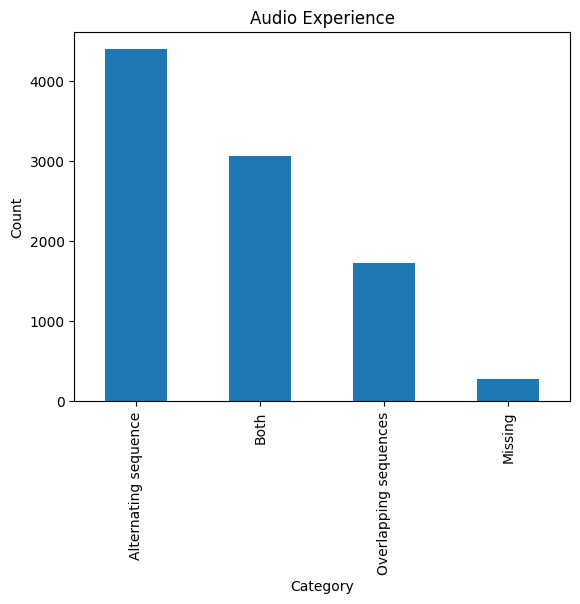

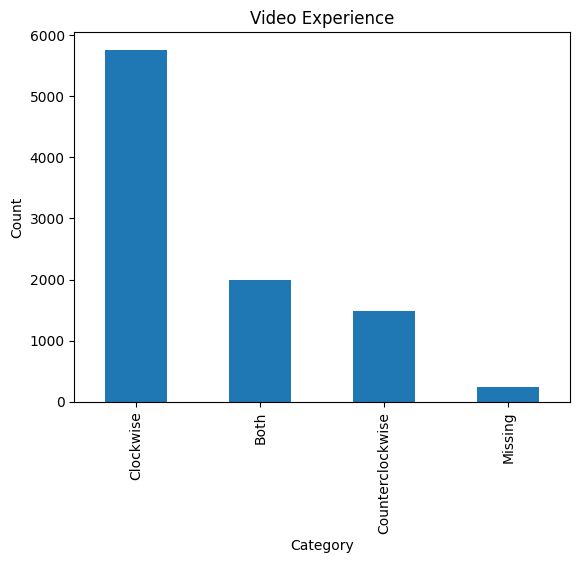

In [22]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# 1. Load
df = pd.read_csv('/content/full_output.csv')

# 2. Parse times columns into lists & counts
def parse_times(x):
    try:
        lst = ast.literal_eval(x)
        return lst if isinstance(lst, list) else []
    except:
        return []

df['audio_times_list'] = df['audio_times'].apply(parse_times)
df['video_times_list'] = df['video_times'].apply(parse_times)
df['audio_times_count'] = df['audio_times_list'].apply(len)
df['video_times_count'] = df['video_times_list'].apply(len)

# 3. Map experience snippets into categories
def map_audio_exp(x):
    if pd.isna(x):
        return 'Missing'
    x = x.lower()
    if 'both' in x:
        return 'Both'
    if 'overlapping' in x:
        return 'Overlapping sequences'
    if 'alternating' in x:
        return 'Alternating sequence'
    return 'Other'

def map_video_exp(x):
    if pd.isna(x):
        return 'Missing'
    x = x.lower()
    if 'both' in x:
        return 'Both'
    if 'counterclockwise' in x:
        return 'Counterclockwise'
    # ensure plain “clockwise” doesn’t catch “counterclockwise”
    if 'clockwise' in x and 'counterclockwise' not in x:
        return 'Clockwise'
    return 'Other'

df['audio_exp_cat'] = df['audio_experience'].apply(map_audio_exp)
df['video_exp_cat'] = df['video_experience'].apply(map_video_exp)

# 4. Print distributions
print("Audio Experience Distribution:\n", df['audio_exp_cat'].value_counts(), "\n")
print("Video Experience Distribution:\n", df['video_exp_cat'].value_counts(), "\n")

# 5. Plot distributions & histograms
plt.figure(); df['audio_exp_cat'].value_counts().plot(kind='bar');
plt.title('Audio Experience'); plt.xlabel('Category'); plt.ylabel('Count'); plt.show()

plt.figure(); df['video_exp_cat'].value_counts().plot(kind='bar');
plt.title('Video Experience'); plt.xlabel('Category'); plt.ylabel('Count'); plt.show()


Audio timestamps per participant:
count     9477.000000
mean        10.662868
median       5.000000
std         24.516653
min          0.000000
max        339.000000
Name: audio_times_count, dtype: float64

Video timestamps per participant:
count     9477.000000
mean         1.855967
median       1.000000
std          4.479143
min          0.000000
max        290.000000
Name: video_times_count, dtype: float64

Audio overall timestamp stats:
  Min: 12.00, 25%: 20464.00, Median: 34528.00, 75%: 47720.00, Max: 60563.00


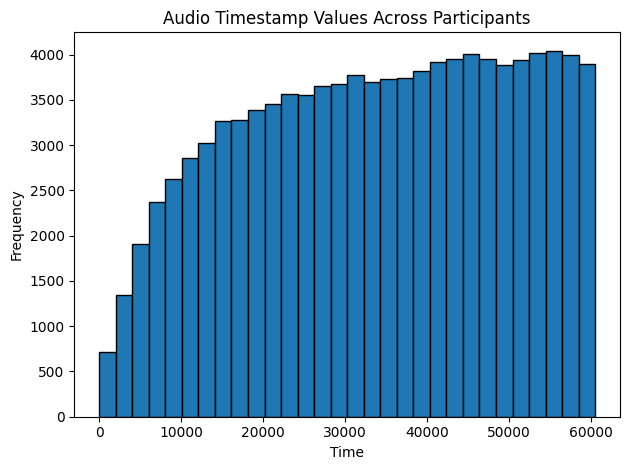


Video overall timestamp stats:
  Min: 523.00, 25%: 23053.00, Median: 36015.00, 75%: 48354.00, Max: 60353.00


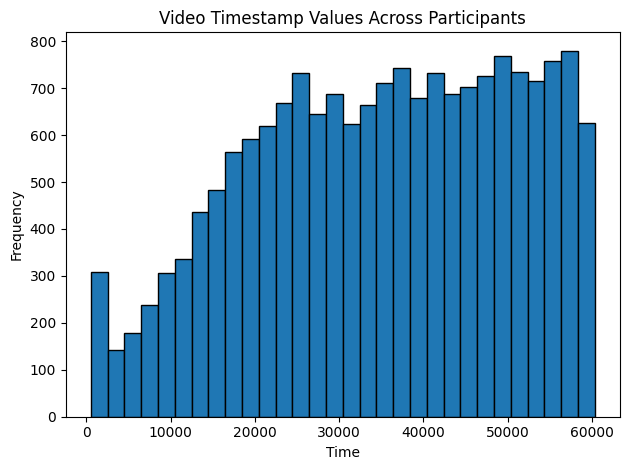

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1. SUMMARY STATS OF COUNTS PER PARTICIPANT
for label, col in [('Audio', 'audio_times_count'), ('Video', 'video_times_count')]:
    counts = df[col]
    print(f"\n{label} timestamps per participant:")
    print(counts.describe()[['count','mean','50%','std','min','max']].rename({'50%':'median'}))
    # e.g. shows count, mean, median, std, min, max

# 2. FLATTEN ALL TIMESTAMPS & PLOT THEIR DISTRIBUTION
for label, list_col in [('Audio', 'audio_times_list'), ('Video', 'video_times_list')]:
    # flatten
    all_times = [t for sublist in df[list_col] for t in sublist]
    if not all_times:
        print(f"No {label.lower()} timestamps to plot.")
        continue

    print(f"\n{label} overall timestamp stats:")
    print(f"  Min: {np.min(all_times):.2f}, 25%: {np.percentile(all_times,25):.2f}, "
          f"Median: {np.median(all_times):.2f}, 75%: {np.percentile(all_times,75):.2f}, "
          f"Max: {np.max(all_times):.2f}")

    # histogram
    plt.figure()
    plt.hist(all_times, bins=30, edgecolor='black')
    plt.title(f'{label} Timestamp Values Across Participants')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


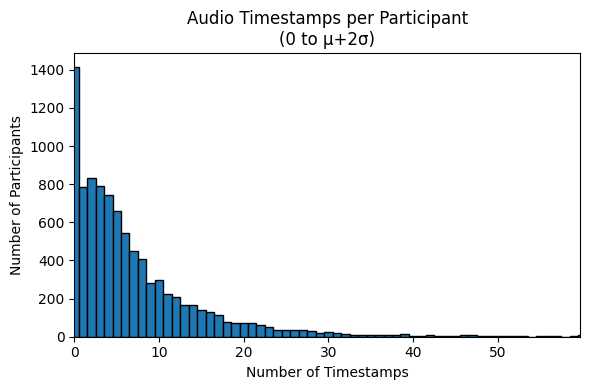

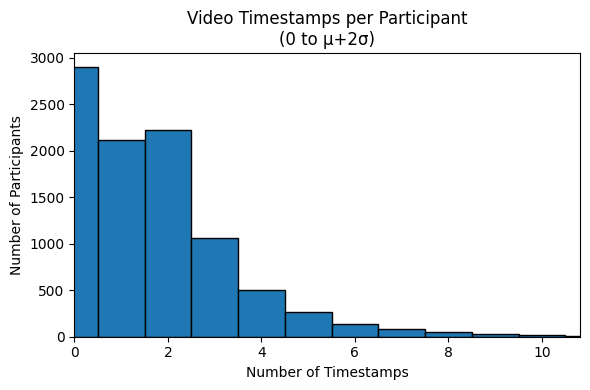

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_hist_nonneg(data, label, sd_multiplier=2):
    mu, sigma = data.mean(), data.std()
    upper = mu + sd_multiplier * sigma

    # bins from 0 up to ceil(upper), centered on integers
    max_bin = int(np.ceil(upper))
    bins = np.arange(0, max_bin + 2) - 0.5

    plt.figure(figsize=(6,4))
    plt.hist(data, bins=bins, edgecolor='black')
    plt.xlim(0, upper)
    plt.title(f'{label} Timestamps per Participant\n(0 to μ+{sd_multiplier}σ)')
    plt.xlabel('Number of Timestamps')
    plt.ylabel('Number of Participants')
    plt.tight_layout()
    plt.show()

# Audio only
plot_hist_nonneg(df['audio_times_count'], 'Audio')

# Video only
plot_hist_nonneg(df['video_times_count'], 'Video')

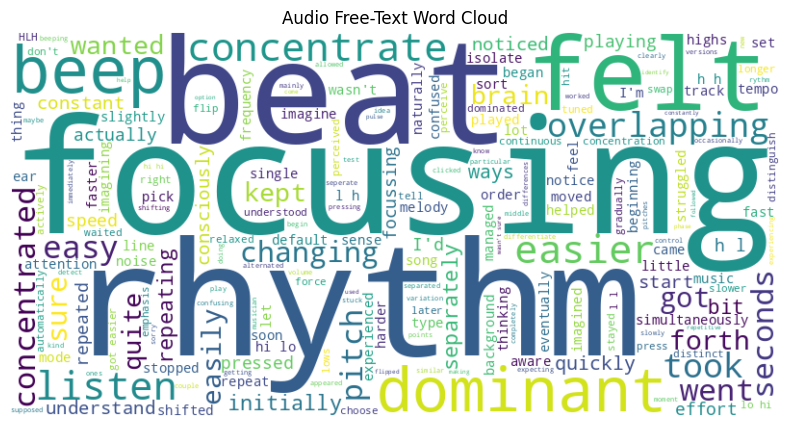


=== LDA Themes for Audio ===
 Theme 1: got, easier, easy, overlapping, took, separately, effort, beat, attention, focussing
 Theme 2: seconds, sure, concentrated, changing, wanted, brain, understand, felt, wasn, noticed
 Theme 3: rhythm, beeps, repeating, went, kept, playing, actually, imagine, start, highs
 Theme 4: focusing, listen, felt, pitch, dominant, ways, speed, beat, hlh, beats
 Theme 5: concentrate, beep, easily, repeated, single, consciously, confused, bit, came, helped


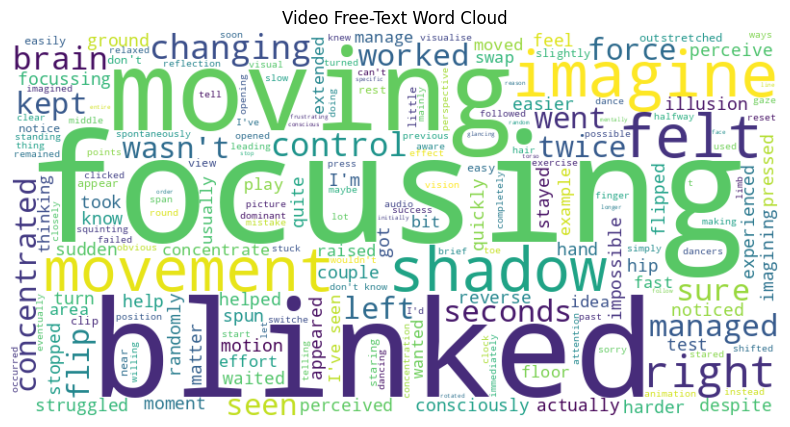


=== LDA Themes for Video ===
 Theme 1: focusing, force, worked, twice, perceived, don, perceive, know, easier, despite
 Theme 2: moving, seen, matter, struggled, imagining, illusion, changing, swap, example, focussing
 Theme 3: shadow, wasn, brain, impossible, took, help, helped, flip, feel, ground
 Theme 4: blinked, right, sure, imagine, concentrated, left, kept, consciously, managed, harder
 Theme 5: control, movement, spun, pressed, felt, actually, flipped, waited, sudden, stayed


In [25]:
# If needed, install wordcloud:
# !pip install wordcloud

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# 1) Load data
df = pd.read_csv('/content/full_output.csv')

# 2) Build your extended stop-words
audio_extra = {
    'sound','sounds','hear','heard','hearing',
    'change','changed','changes','different','difference',
    'sequence','sequences','pattern','patterns',
    'high','low','higher','lower',
    'focus','focused','focussed','concentrating',
    'just','really','didn','didnt','trying','tried','try',
    'time','times','task','tasks',
    'tune','tunes','tone','tones','note','notes',
    'listened','listening',
    'switch','switching','alternate','alternating','alternative',
    'way','point','version','end','mind','bar','space',
    'differently','switched','started',"didn't","couldn't",
    'sounded','experience','separate'
}

video_extra = {
    'video','watch','watched','watching','seeing','screen',
    'direction','turning','rotating','rotate','spinning','spin',
    'dancer','figure','bar','space','spacebar',
    'eye','eyes','feet','foot','leg','legs','arm','arms','head','body','hands',
    'blink','blinking','closed','closing','close','briefly',
    'didn','didnt','didn’t','did','make','trying','tried','try','just','way',
    'think','thought','couldn','couldnt','couldn’t','hard','difficult','able','unable',
    'happen','happened','work','really','like','point','end','half','long',
    'saw','look','looking','away',
    'counterclockwise','counter clockwise','clockwise',"didn't",
    "couldn't",'looked','opposite','suddenly','counter','anti','anticlockwise',
    'going','parts','image','directions','shift','rotation','perception','second'
}

# Combine into one set, then to list
stop_words = ENGLISH_STOP_WORDS.union(audio_extra).union(video_extra)
stop_words_list = list(stop_words)

# 3) Word-Cloud Generator
def make_wordcloud(text, label):
    if not text.strip():
        print(f"No {label.lower()} text.")
        return
    wc = WordCloud(
        width=800, height=400,
        background_color='white',
        stopwords=stop_words_list  # WordCloud accepts set or list
    ).generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{label} Free-Text Word Cloud')
    plt.show()

# 4) LDA Themes Extractor
def lda_themes(text_series, label, n_topics=5):
    print(f"\n=== LDA Themes for {label} ===")
    cv = CountVectorizer(
        stop_words=stop_words_list,    # now a list
        token_pattern=r'\b[a-zA-Z]{3,}\b',
        max_features=1000
    )
    dtm = cv.fit_transform(text_series.fillna(''))
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(dtm)
    terms = cv.get_feature_names_out()
    for i, comp in enumerate(lda.components_):
        top_idx = comp.argsort()[-10:][::-1]
        top_terms = [terms[j] for j in top_idx]
        print(f" Theme {i+1}: " + ", ".join(top_terms))

# 5) Run for both columns
for col,label in [
    ('audio_free_text','Audio'),
    ('video_free_text','Video')
]:
    joined = ' '.join(df[col].dropna().astype(str))
    make_wordcloud(joined, label)
    lda_themes(df[col], label)

In [42]:
import pandas as pd
import ast

# 1) Load your data
df = pd.read_csv('/content/pcd007_test_bistable_experiences_demographics.csv')  # ← adjust path as needed

# 2) Helper to parse list-strings
def parse_list_cell(x):
    """Turn a literal Python list in a cell into a real list, or [] if missing."""
    try:
        lst = ast.literal_eval(x)
        return lst if isinstance(lst, list) else []
    except:
        return []

# 3) Explode hearing & clinical_trait
for col in ['hearing', 'clinical_trait']:
    # parse into lists
    df[col + '_list'] = df[col].fillna('[]').apply(parse_list_cell)
    # explode so each row has one element
    exploded = df[[col + '_list']].explode(col + '_list')
    uniques = exploded[col + '_list'].dropna().unique().tolist()

# 4) Case-normalize postcode, born, country
for col in ['postcode', 'born', 'country']:
    norm_col = col + '_norm'
    df[norm_col] = df[col].astype(str).str.lower().str.strip()
    uniques = df[norm_col].dropna().unique().tolist()

# 5) Re-inspect your other simple columns
simple_cols = [
    'vision','age_group','gender','english','in_uk',
    'screen_reader','corrected','handedness'
]
for col in simple_cols:
    uniques = df[col].dropna().unique().tolist()
    print(f"\nUnique values in {col} ({len(uniques)}):")
    print(uniques)


Unique values in vision (7):
['long', 'short', 'perfect', 'longandshort2', 'longandshort', 'monocular', 'substantial']

Unique values in age_group (8):
['51-60', '31-40', '71+', '61-70', '21-30', '41-50', '18-20', 'prefer-not-to-say']

Unique values in gender (5):
['male', 'female', 'non-binary', 'other', 'prefer-not-to-say']

Unique values in english (2):
['yes', 'no']

Unique values in in_uk (2):
['yes', 'no']

Unique values in screen_reader (2):
['can_read', 'screen_reader']

Unique values in corrected (2):
['yes', 'no']

Unique values in handedness (3):
['left', 'right', 'either']


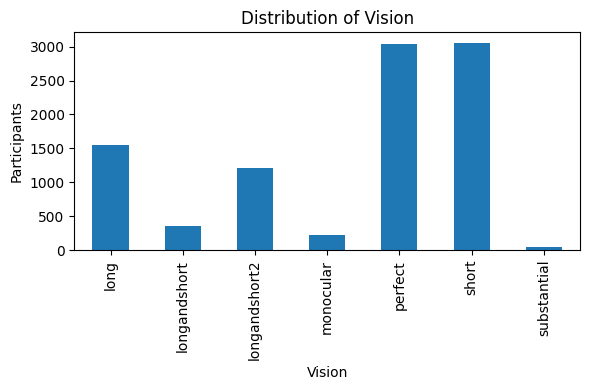

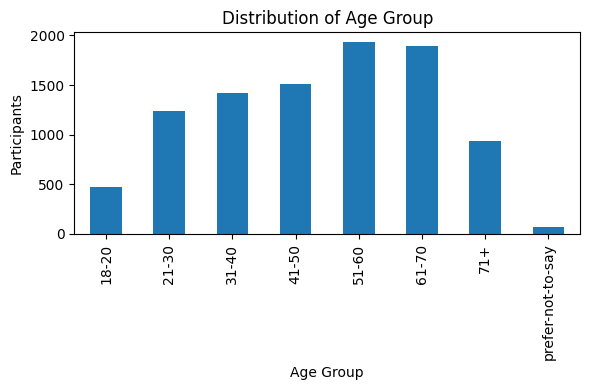

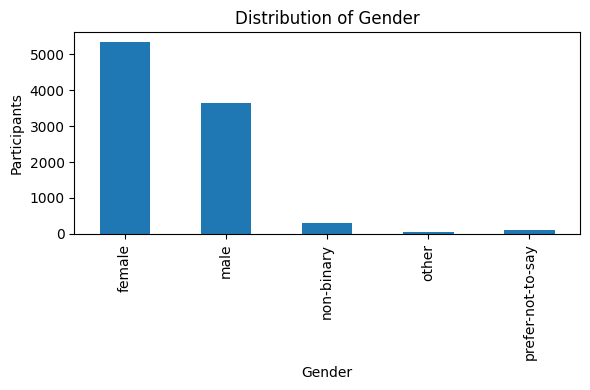

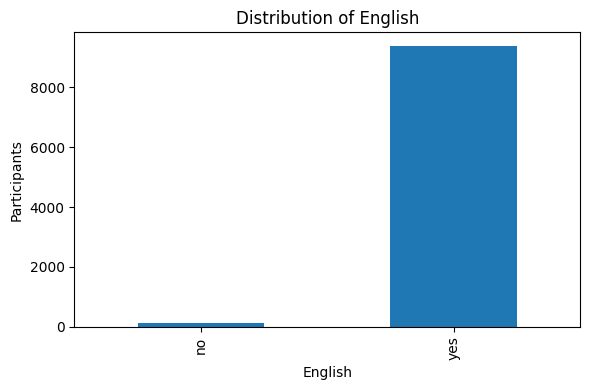

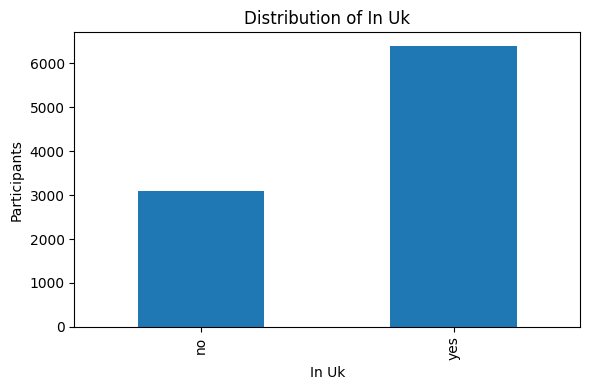

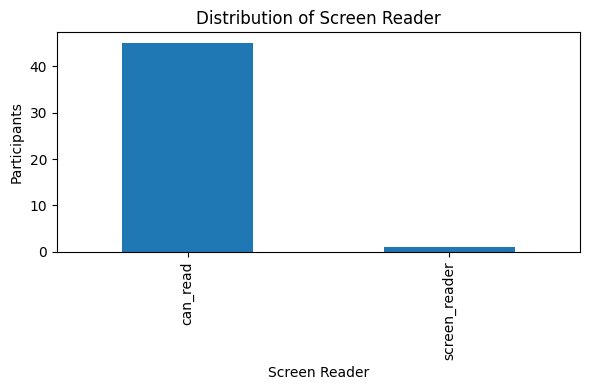

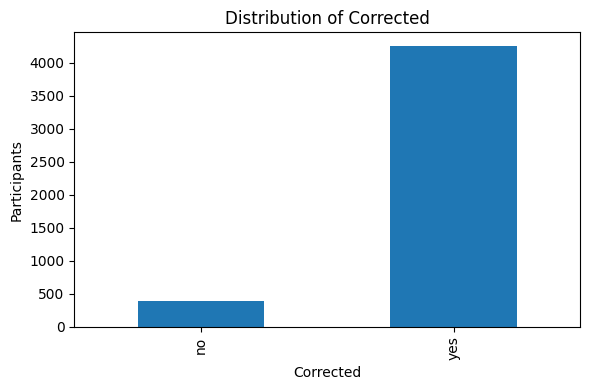

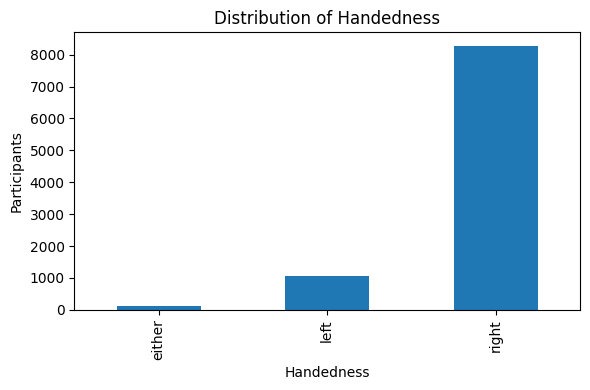

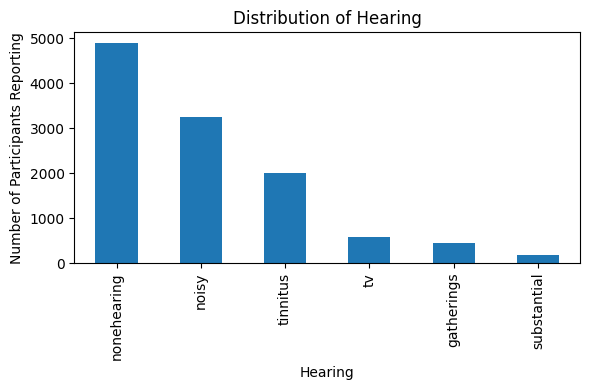

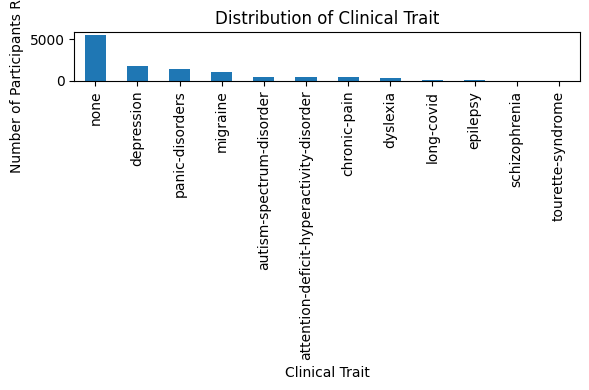

In [38]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 1) Load your dataset — update the path if needed
df = pd.read_csv('/content/pcd007_test_bistable_experiences_demographics.csv')

# 2) Normalize postcode, born, country (make lowercase & strip)
for col in ['postcode', 'born', 'country']:
    df[col + '_norm'] = df[col].astype(str).str.lower().str.strip()

# 3) Parse list-encoded columns into real lists
def parse_list_cell(x):
    try:
        lst = ast.literal_eval(x)
        return lst if isinstance(lst, list) else []
    except:
        return []

for col in ['hearing', 'clinical_trait']:
    df[col + '_list'] = df[col].fillna('[]').apply(parse_list_cell)

# 4) Plot simple categorical demographics
simple_cats = [
    'vision', 'age_group', 'gender', 'english', 'in_uk',
    'screen_reader', 'corrected', 'handedness'
]

for col in simple_cats:
    counts = df[col].value_counts().sort_index()
    plt.figure(figsize=(6,4))
    counts.plot(kind='bar')
    plt.title(f'Distribution of {col.replace("_"," ").title()}')
    plt.xlabel(col.replace("_"," ").title())
    plt.ylabel('Participants')
    plt.tight_layout()
    plt.show()

# 5) Plot multi-valued demographics (hearing, clinical_trait)
for col in ['hearing_list', 'clinical_trait_list']:
    all_vals = df[col].explode().dropna()
    counts = all_vals.value_counts().sort_values(ascending=False)
    plt.figure(figsize=(6,4))
    counts.plot(kind='bar')
    label = col.replace('_list','').replace('_',' ').title()
    plt.title(f'Distribution of {label}')
    plt.xlabel(label)
    plt.ylabel('Number of Participants Reporting')
    plt.tight_layout()
    plt.show()

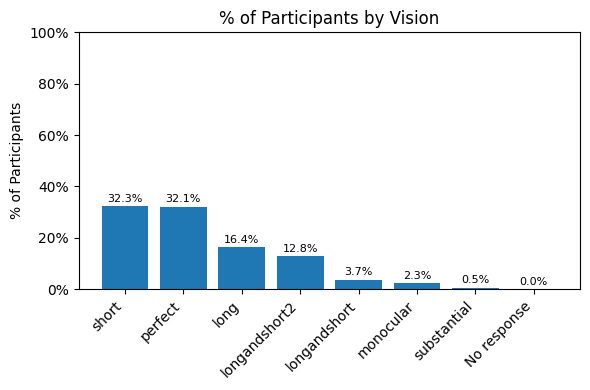

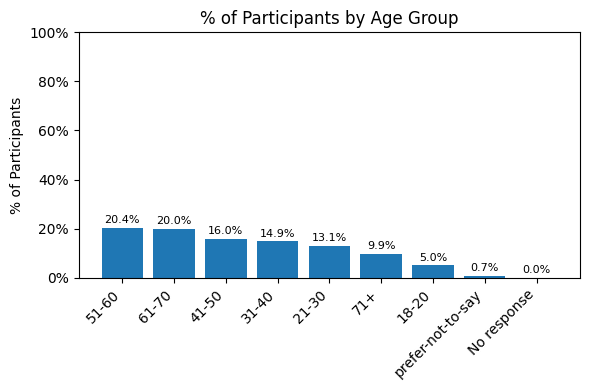

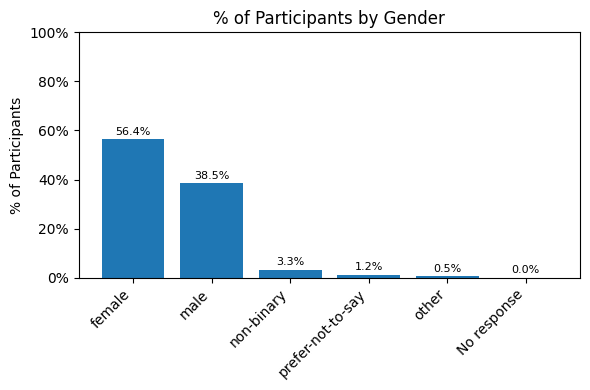

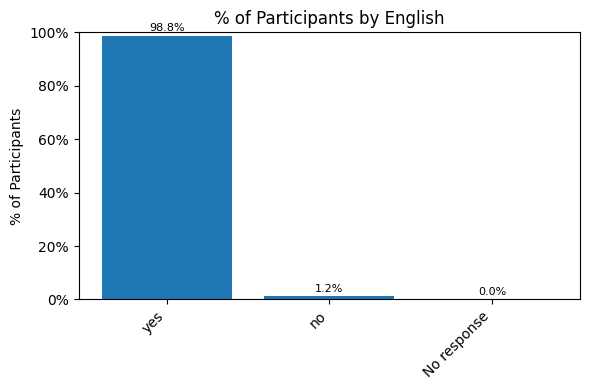

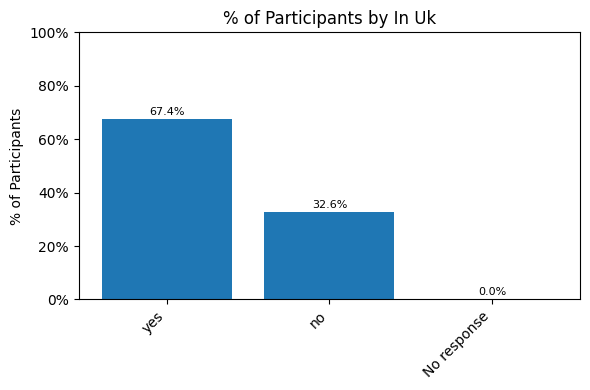

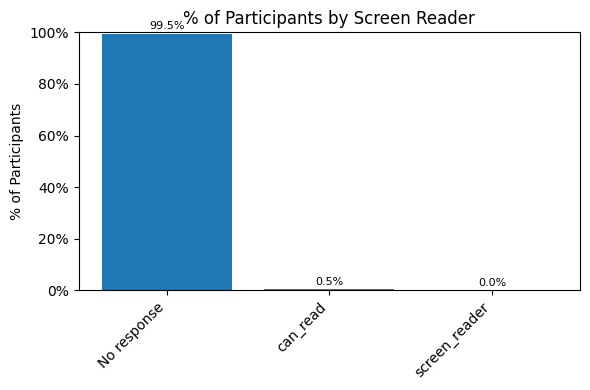

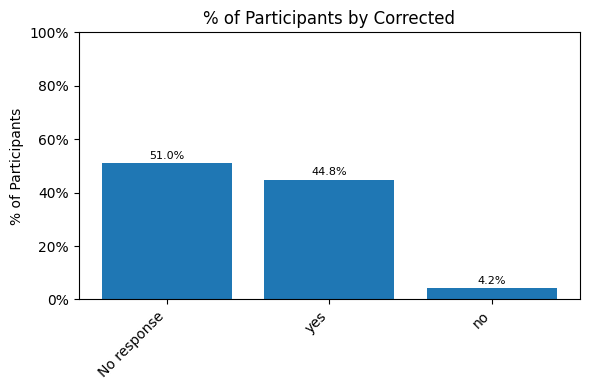

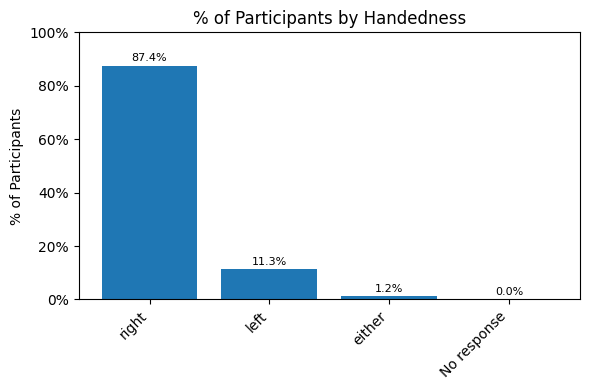

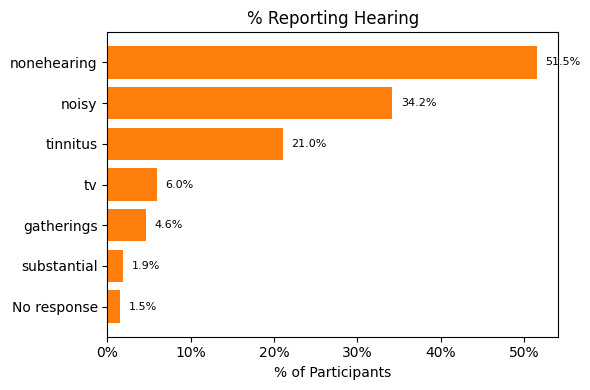

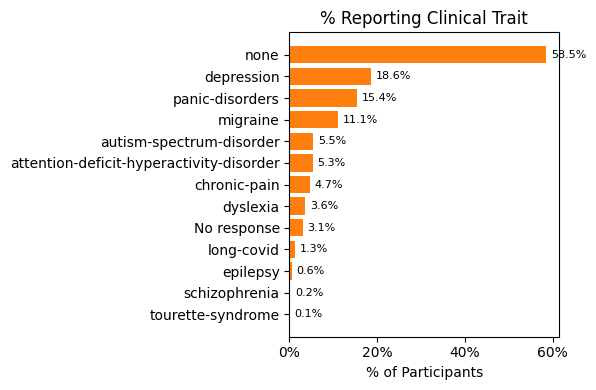

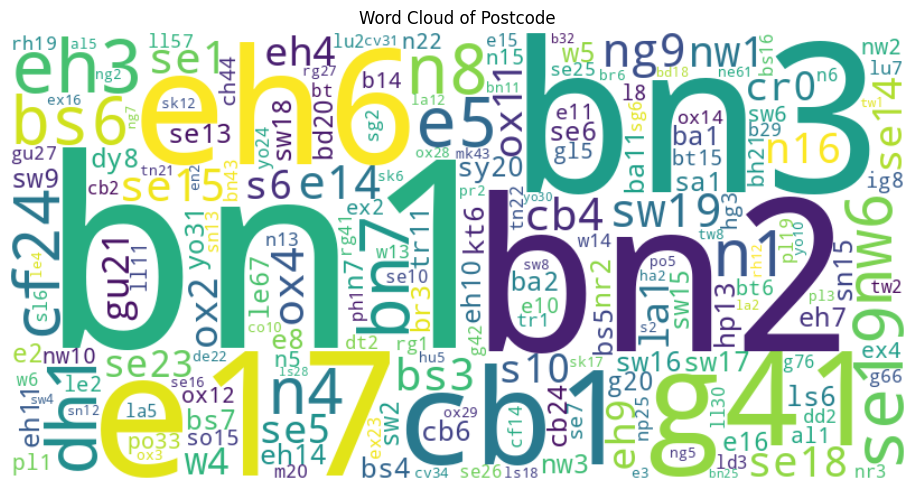

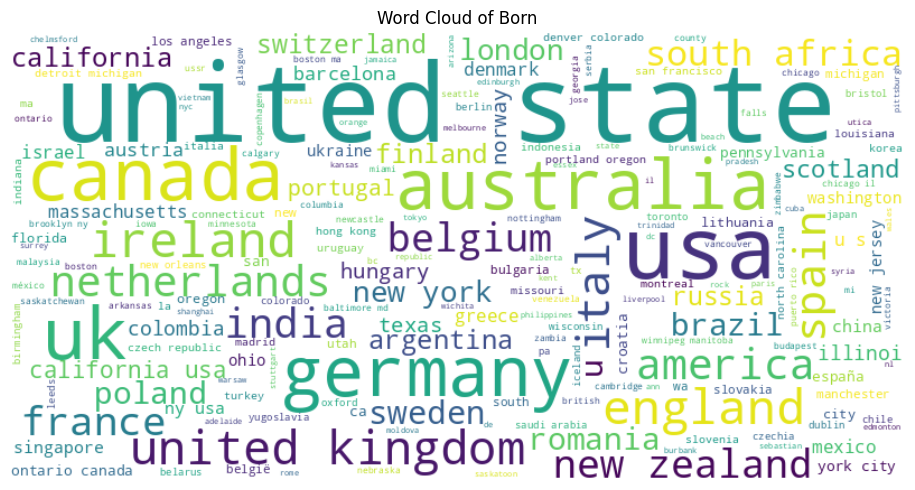

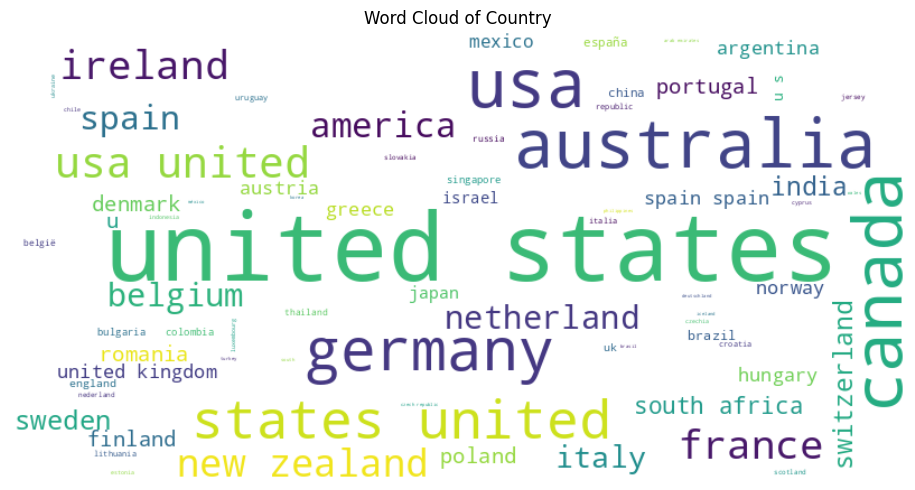

In [41]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 1) Load your dataset — adjust path if needed
df = pd.read_csv('/content/pcd007_test_bistable_experiences_demographics.csv')

# 2) Normalize postcode, born, country (lowercase & strip)
for col in ['postcode', 'born', 'country']:
    df[f'{col}_norm'] = df[col].astype(str).str.lower().str.strip()

# 3) Parse list-encoded columns into real lists
def parse_list_cell(x):
    try:
        lst = ast.literal_eval(x)
        return lst if isinstance(lst, list) else []
    except:
        return []

for col in ['hearing', 'clinical_trait']:
    df[f'{col}_list'] = df[col].fillna('[]').apply(parse_list_cell)

n_total = len(df)

# ... after steps 1–3 (loading, normalizing, parsing) ...

import matplotlib.ticker as mtick

n_total = len(df)

# 4) Simple categorical demographics: (same as before)
for col in simple_cats:
    col_title = col.replace('_',' ').title()
    counts = df[col].fillna('No response').value_counts(dropna=False)
    pct   = counts / n_total * 100

    # Vertical bar still works for simple cats:
    fig, ax = plt.subplots(figsize=(6,4))
    bars = ax.bar(pct.index.astype(str), pct.values, color='C0')
    ax.set_title(f'% of Participants by {col_title}')
    ax.set_ylabel('% of Participants')
    ax.set_ylim(0,100)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    for bar, val in zip(bars, pct.values):
        ax.text(bar.get_x() + bar.get_width()/2, val + 1, f'{val:.1f}%',
                ha='center', va='bottom', fontsize=8)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Pie chart (optional—keep or remove if too busy)
    # …

# 5) Multi‐select fields: horizontal bars, no legend
for col in ['hearing_list', 'clinical_trait_list']:
    label = col.replace('_list','').replace('_',' ').title()
    exploded = df[[col]].explode(col)
    report_counts = exploded[col].dropna().value_counts()
    no_resp = (df[col].apply(len) == 0).sum()
    report_counts['No response'] = no_resp
    pct = report_counts / n_total * 100
    pct = pct.sort_values(ascending=True)  # small→big so the biggest bar is on top

    fig, ax = plt.subplots(figsize=(6, max(4, 0.3*len(pct))))
    bars = ax.barh(pct.index.astype(str), pct.values, color='C1')
    ax.set_title(f'% Reporting {label}')
    ax.set_xlabel('% of Participants')
    ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    for bar, val in zip(bars, pct.values):
        ax.text(val + 1, bar.get_y() + bar.get_height()/2, f'{val:.1f}%',
                va='center', fontsize=8)
    plt.tight_layout()
    plt.show()

# 6) Word clouds for postcode_norm, born_norm, country_norm (exclude "nan")
for col in ['postcode_norm','born_norm','country_norm']:
    vals = df[col].dropna().astype(str)
    vals = vals[vals.str.lower() != 'nan']
    text = ' '.join(vals)
    if not text:
        continue
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of {col.replace("_norm","").capitalize()}')
    plt.tight_layout()
    plt.show()
